## Feature Selection (Seleção de Variáveis):

- Métodos Não Supervisionados

  - Eliminação de Features por % de Valores Nulos (Missings)
    - Etapa realizada no dataprep

  - Eliminação de Features por Variância

  - Eliminação de Features por Análise de Componentes Principais (PCA)

  - Eliminação de Features por Análise de Correlação de Pearson

- Métodos Supervisionados

  - Eliminação de Features por Feature Importance

  - Recursive Feature Elimination (RFE)

  - Eliminação de Features por método Boruta

  - Eliminação de Features pelo Information Value (Target Binário)

#### Ler tabela de moedlagem pós preparação de dados:

In [4]:
import pandas as pd
import numpy as np

# Ler diretório Parquet
abt_00 = pd.read_csv('/content/drive/Shareddrives/PoD Academy/Cursos/Formação em Ciência de Dados/dados/Kaggle/Titanic/abt_titanic.csv')
abt_00.drop(axis=1,columns='Unnamed: 0',inplace=True)
abt_00.shape

(891, 10)

In [5]:
abt_00.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male,Survived
0,1.0,0.271174,0.125,0.0,523,0.014151,3,3,1.0,0
1,0.0,0.472229,0.125,0.0,596,0.139136,0,4,0.0,1
2,1.0,0.321438,0.000,0.0,669,0.015469,3,2,0.0,1
3,0.0,0.434531,0.125,0.0,49,0.103644,3,4,0.0,1
4,1.0,0.434531,0.000,0.0,472,0.015713,3,3,1.0,0


#### Vamos inserir variáveis que são ruidos (para analise didática)

In [6]:
# Adicionando ruído uniforme
abt_00['var_porcaria_1'] = np.random.uniform(low=0, high=1, size=abt_00.shape[0])
abt_00['var_noise_2'] = np.random.uniform(low=0.5, high=1, size=abt_00.shape[0])
abt_00['var_noise_3'] = np.random.uniform(low=0.5, high=2, size=abt_00.shape[0])
abt_00['var_cte_1'] = 10
abt_00['var_cte_2'] = 0

# Adicionando variaveis derivadas de outras
abt_00['var_der_1'] = 2*abt_00['Age']
abt_00['var_der_2'] = 3*abt_00['Age']
abt_00['var_der_3'] = 4*abt_00['Fare']

abt_00.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male,Survived,var_porcaria_1,var_noise_2,var_noise_3,var_cte_1,var_cte_2,var_der_1,var_der_2,var_der_3
0,1.0,0.271174,0.125,0.0,523,0.014151,3,3,1.0,0,0.889838,0.963940,1.010229,10,0,0.542347,0.813521,0.056604
1,0.0,0.472229,0.125,0.0,596,0.139136,0,4,0.0,1,0.757715,0.926663,1.591899,10,0,0.944458,1.416688,0.556543
2,1.0,0.321438,0.000,0.0,669,0.015469,3,2,0.0,1,0.999003,0.978230,1.428551,10,0,0.642875,0.964313,0.061874
3,0.0,0.434531,0.125,0.0,49,0.103644,3,4,0.0,1,0.537626,0.956417,0.854895,10,0,0.869063,1.303594,0.414577
4,1.0,0.434531,0.000,0.0,472,0.015713,3,3,1.0,0,0.829934,0.678040,1.701693,10,0,0.869063,1.303594,0.062850


## **Seleção de Variáveis por Variância**
Variáveis com baixa variância não contêm muita informação e, portanto, podem ser removidas do conjunto de dados sem muito prejuízo para a qualidade do modelo de aprendizado de máquina.



A seleção de variáveis com base na variância, como implementada pelo *VarianceThreshold* do scikit-learn, considera a variância das variáveis explicativas.

A variância ($ \text{Var}(X) $) de uma variável aleatória $ X $ é definida pela fórmula:

$
\text{Var}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$

Onde:
- $ n $ é o número de observações (ou amostras).
- $ x_i $ é o valor da i-ésima observação.
- $ \bar{x} $ é a média dos valores de $ X $.

O ***VarianceThreshold*** então compara esta variância calculada para cada característica com o limiar especificado. Variáveis cuja variância é menor que o limiar são removidas.

No contexto da seleção de variáveis, a ideia é que variáveis com baixa variância (ou seja, cujos valores são quase constantes) não contribuem muito para a previsão ou classificação, pois elas têm pouca variabilidade e, portanto, pouca informação útil. Ao definir um limiar para a variância, você pode filtrar essas variáveis de baixa variância.

In [7]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Definindo o limiar (queremos manter as variáveis que têm uma variância superior ao valor definido)
# Se colocar valor 0 (zero) apenas variáveis constantes serão descartadas
threshold = 0

selector = VarianceThreshold(threshold)
selector.fit_transform(abt_00)

# Colunas selecionadas
selected_features = abt_00.columns[selector.get_support()]
discarded_features = abt_00.columns[~selector.get_support()]
print('Variáveis que serão deletadas: ', discarded_features)

# Mantendo somente as variáveis selecionadas na ABT
abt_01 = abt_00[selected_features]

abt_01.head()

Variáveis que serão deletadas:  Index(['var_cte_1', 'var_cte_2'], dtype='object')


,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male,Survived,var_porcaria_1,var_noise_2,var_noise_3,var_der_1,var_der_2,var_der_3
0,1.0,0.271174,0.125,0.0,523,0.014151,3,3,1.0,0,0.889838,0.963940,1.010229,0.542347,0.813521,0.056604
1,0.0,0.472229,0.125,0.0,596,0.139136,0,4,0.0,1,0.757715,0.926663,1.591899,0.944458,1.416688,0.556543
2,1.0,0.321438,0.000,0.0,669,0.015469,3,2,0.0,1,0.999003,0.978230,1.428551,0.642875,0.964313,0.061874
3,0.0,0.434531,0.125,0.0,49,0.103644,3,4,0.0,1,0.537626,0.956417,0.854895,0.869063,1.303594,0.414577
4,1.0,0.434531,0.000,0.0,472,0.015713,3,3,1.0,0,0.829934,0.678040,1.701693,0.869063,1.303594,0.062850


## **Seleção de variáveis por PCA (Análise de Componentes Principais)**


A Análise de Componentes Principais (PCA) é uma técnica de redução de dimensionalidade que transforma os dados originais em um novo espaço de coordenadas, onde a maior variância dos dados ocorre no primeiro eixo (o primeiro componente principal), a segunda maior variância no segundo eixo, e assim por diante.

Passo a passo da formulação matemática do PCA:

1. **Padronização**:
   
   Primeiro, é importante padronizar os dados para ter média zero e variância unitária. Dada uma matriz de dados $ X $ de tamanho $ m \times n $ (onde $ m $ é o número de observações e $ n $ é o número de variáveis), a matriz padronizada $ Z $ é dada por:
   
   $
   Z = \frac{X - \mu}{\sigma}
   $
   
   onde $ \mu $ é a média das variáveis e $ \sigma $ é o desvio padrão.

2. **Matriz de Covariância**:

   A matriz de covariância $ C $ é calculada a partir da matriz padronizada $ Z $:

   $
   C = \frac{1}{m-1} Z^T Z
   $

   Esta matriz descreve a variância e covariância entre cada par de variáveis no conjunto de dados.

3. **Decomposição de Autovalores**:

   A matriz de covariância é então decomposta em seus autovalores e autovetores:

   $
   C v = \lambda v
   $

   onde $ \lambda $ é o autovalor e $ v $ é o autovetor correspondente.

4. **Ordenação dos Autovalores**:

   Os autovalores são ordenados em ordem decrescente. Os autovetores correspondentes definem os componentes principais. O primeiro componente principal é o autovetor correspondente ao maior autovalor, o segundo componente principal é o autovetor correspondente ao segundo maior autovalor, e assim por diante.

5. **Projeção nos Componentes Principais**:

   Finalmente, os dados originais são projetados nos componentes principais para obter a representação reduzida. Dada a matriz de autovetores $ V $ e a matriz padronizada $ Z $, os dados transformados $ T $ são dados por:

   $
   T = Z V
   $

   Se você desejar reter apenas os primeiros $ k $ componentes principais, então use apenas os primeiros $ k $ autovetores para esta transformação.

**Explicação**:

- A ideia fundamental do PCA é encontrar direções (ou componentes) que maximizem a variância nos dados. Estas direções são os autovetores da matriz de covariância.
- Os autovalores correspondentes indicam a quantidade de variância explicada por cada componente.
- Ao projetar os dados nesses componentes, obtemos uma representação de menor dimensão dos dados que retém a maior parte da variabilidade.
- Como os componentes são ortogonais entre si, eles são descorrelacionados, o que pode ser benéfico para muitos algoritmos de aprendizado de máquina.

In [8]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

X = abt_01.drop(axis=1,columns='Survived')
features = X.columns

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando PCA
pca = PCA(n_components=None) # Se None todos componentes vão ficar mantidos
pca.fit(X_scaled)

# Extraindo as cargas e criando um DataFrame
loadings = pca.components_
loading_df = pd.DataFrame(loadings, columns=features, index=['PC'+str(i) for i in range(1, loadings.shape[0]+1)])
loading_df_transposed = loading_df.transpose()

loading_df

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male,var_porcaria_1,var_noise_2,var_noise_3,var_der_1,var_der_2,var_der_3
PC1,-2.911281e-01,0.501507,-1.717107e-01,-1.219784e-01,-8.517436e-02,0.165464,-7.933144e-02,2.116501e-01,2.506660e-02,-2.733187e-02,2.388787e-02,3.616957e-02,0.501507,0.501507,0.165464
PC2,-3.287412e-01,-0.121144,2.404008e-01,2.836929e-01,-5.384160e-02,0.542255,-1.963591e-01,-1.422474e-01,-2.401690e-01,-2.244399e-02,-3.326690e-02,-2.377761e-02,-0.121144,-0.121144,0.542255
PC3,2.253306e-01,0.177844,4.684896e-01,4.872123e-01,2.812390e-01,-0.052452,3.558309e-01,9.363015e-02,-1.359402e-01,5.751886e-02,-3.909189e-01,5.382200e-02,0.177844,0.177844,-0.052452
PC4,1.578328e-01,-0.016774,-3.334639e-03,-1.514843e-01,6.362511e-01,0.198183,-1.462760e-01,7.665589e-03,4.223974e-01,1.147326e-01,8.699637e-02,4.973031e-01,-0.016774,-0.016774,0.198183
PC5,1.117688e-01,-0.034619,-2.218386e-01,-4.332511e-02,2.094100e-01,-0.009157,-3.199783e-01,3.534915e-01,-4.355233e-01,6.518917e-01,-1.323552e-01,-1.711697e-01,-0.034619,-0.034619,-0.009157
PC6,2.220702e-01,0.052591,7.573891e-02,8.745081e-02,4.244841e-01,0.017156,-1.574664e-01,1.234291e-01,-1.479355e-01,-4.084250e-01,5.074273e-01,-5.118783e-01,0.052591,0.052591,0.017156
PC7,-3.483388e-02,0.093739,1.427633e-01,-1.350071e-01,1.086746e-01,0.027596,-4.762476e-03,-5.622483e-01,3.571333e-01,4.024809e-01,-9.855504e-02,-5.523497e-01,0.093739,0.093739,0.027596
PC8,4.804035e-03,0.034853,2.250287e-01,2.049126e-01,-2.198498e-01,-0.013755,2.406525e-01,2.903355e-02,1.770009e-02,4.746141e-01,7.347698e-01,1.754374e-01,0.034853,0.034853,-0.013755
PC9,-6.294277e-02,-0.114855,-2.143041e-01,-1.694086e-01,7.425355e-02,0.247043,6.898204e-01,4.001816e-01,1.739314e-01,4.408691e-02,-4.405705e-02,-2.900511e-01,-0.114855,-0.114855,0.247043
PC10,-1.156020e-01,0.045642,-2.164263e-01,-2.492070e-01,3.029625e-01,-0.010281,3.814732e-01,-4.988495e-01,-5.827526e-01,-2.297767e-02,9.922634e-02,1.873430e-01,0.045642,0.045642,-0.010281


**Curva da Variância Explicada**

Cada ponto na curva representa o autovalor (ou variância explicada) de um componente principal.

Esta curva pode ajudar a determinar o número de componentes a serem retidos, usando o critério do "cotovelo". O ponto onde a curva começa a se estabilizar ou nivelar pode ser considerado um bom ponto de corte, indicando que os componentes adicionais não adicionam significativamente mais informação (variância explicada).

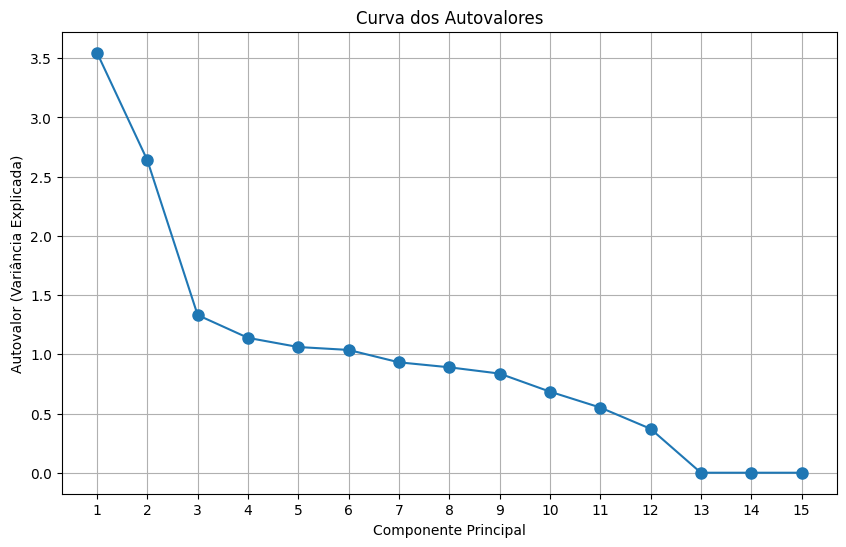

In [9]:
# Obtendo os autovalores (explicados pela variância) dos componentes principais
eigenvalues = pca.explained_variance_

# Plotando a curva dos autovalores
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'o-', markersize=8)
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor (Variância Explicada)')
plt.title('Curva dos Autovalores')
plt.xticks(range(1, len(eigenvalues)+1))
plt.grid(True)
plt.show()


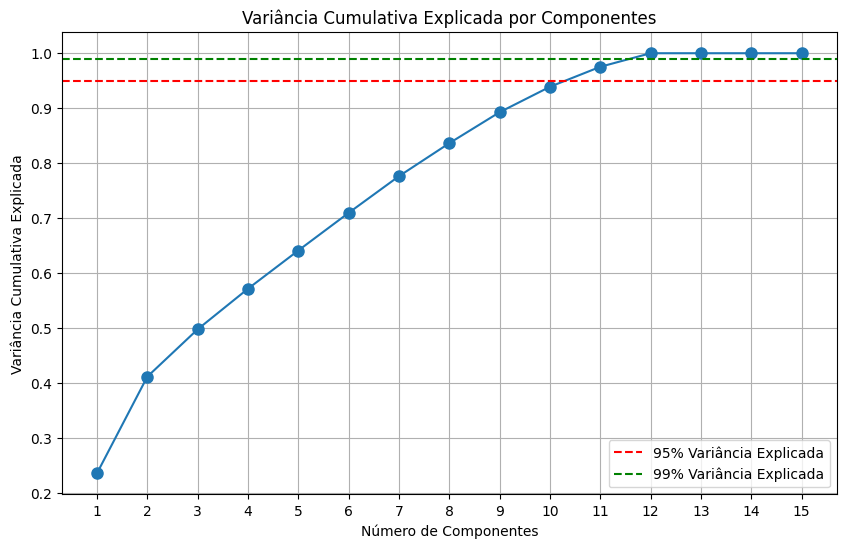

In [72]:
# Calculando a variância cumulativa
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plotando a variância cumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, 'o-', markersize=8)
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Cumulativa Explicada')
plt.title('Variância Cumulativa Explicada por Componentes')
plt.xticks(range(1, len(cumulative_variance_ratio)+1))
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variância Explicada')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% Variância Explicada')
plt.legend(loc='best')
plt.show()


In [10]:
# Aplicando PCA para selecionar variáveis
pca = PCA(n_components=5) # Se None todos componentes vão ficar mantidos
pca.fit(X_scaled)

# Extraindo as cargas e criando um DataFrame
loadings = pca.components_
loading_df = pd.DataFrame(loadings, columns=features, index=['PC'+str(i) for i in range(1, loadings.shape[0]+1)])
loading_df_transposed = loading_df.transpose()
loading_df_transposed

,PC1,PC2,PC3,PC4,PC5
Pclass,-0.291128,-0.328741,0.225331,0.157833,0.111769
Age,0.501507,-0.121144,0.177844,-0.016774,-0.034619
SibSp,-0.171711,0.240401,0.468490,-0.003335,-0.221839
Parch,-0.121978,0.283693,0.487212,-0.151484,-0.043325
Ticket,-0.085174,-0.053842,0.281239,0.636251,0.209410
Fare,0.165464,0.542255,-0.052452,0.198183,-0.009157
Embarked,-0.079331,-0.196359,0.355831,-0.146276,-0.319978
Titulo,0.211650,-0.142247,0.093630,0.007666,0.353492
Sex_male,0.025067,-0.240169,-0.135940,0.422397,-0.435523
var_porcaria_1,-0.027332,-0.022444,0.057519,0.114733,0.651892


In [82]:
x = 1  # Por exemplo, vamos pegar a primeira variável de maior loading absoluto para cada componente

# Identificando as 'x' variáveis de maior loading absoluto para cada componente
top_loadings = {}

for component in loading_df_transposed.columns:
    sorted_loadings = loading_df_transposed[component].abs().sort_values(ascending=False)
    top_loadings[component] = sorted_loadings.index[:x].tolist()

# Gerando uma lista única de variáveis de top loadings de todos os componentes
unique_top_loadings = list(set([item for sublist in top_loadings.values() for item in sublist]))
top_loadings

{'PC1': ['var_der_1'],
 'PC2': ['Fare'],
 'PC3': ['SibSp'],
 'PC4': ['Ticket'],
 'PC5': ['Sex_male']}

In [83]:
unique_top_loadings

['Sex_male', 'Ticket', 'SibSp', 'Fare', 'var_der_1']

In [84]:
# Mantendo somente as variáveis selecionadas na ABT
abt_02 = abt_00[unique_top_loadings]

abt_02.head()

,Sex_male,Ticket,SibSp,Fare,var_der_1
0,1.0,523,0.125,0.014151,0.542347
1,0.0,596,0.125,0.139136,0.944458
2,0.0,669,0.000,0.015469,0.642875
3,0.0,49,0.125,0.103644,0.869063
4,1.0,472,0.000,0.015713,0.869063


## Eliminação de Features por Correlação de Pearson

A correlação de Pearson mede a relação linear entre duas variáveis. Se duas variáveis têm uma alta correlação (próxima de 1 ou -1), isso significa que uma pode ser prevista a partir da outra com um alto grau de precisão.

Neste caso podemos retirar da tabela uma das variáveis de alta correlação.
Este não é um bom método para seleção de variáveis, veja os demais que estão neste material.

A correlação de Pearson, muitas vezes representada por $ r $, é uma medida da relação linear entre duas variáveis contínuas. Ela varia entre -1 e 1, onde:

- $ r = 1 $: correlação positiva perfeita.
- $ r = -1 $: correlação negativa perfeita.
- $ r = 0 $: nenhuma correlação linear.

A fórmula para calcular a correlação de Pearson entre duas variáveis $ X $ e $ Y $ é:

$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$

Onde:

- $ X_i $ e $ Y_i $ são os valores das variáveis $ X $ e $ Y $, respectivamente.
- $ \bar{X} $ e $ \bar{Y} $ são as médias das variáveis $ X $ e $ Y $, respectivamente.

A equação acima pode ser decomposta nas seguintes partes:

1. $ X_i - \bar{X} $ é o desvio da observação $ X_i $ em relação à média de $ X $.
2. $ Y_i - \bar{Y} $ é o desvio da observação $ Y_i $ em relação à média de $ Y $.
3. O numerador, $ \sum (X_i - \bar{X})(Y_i - \bar{Y}) $, é a soma dos produtos dos desvios, que dá uma ideia da relação entre os desvios de $ X $ e $ Y $.
4. O denominador normaliza a medida, de modo que o valor de $ r $ fique entre -1 e 1.

Assim, a correlação de Pearson é essencialmente uma medida normalizada do covariância entre as duas variáveis.

In [176]:
def remove_highly_correlated_features(df, threshold=0.9):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Select the upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Identify columns to drop based on the threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Drop the columns
    df_reduced = df.drop(columns=to_drop)

    return df_reduced, to_drop


df_reduced, dropped_features = remove_highly_correlated_features(abt_00.drop(columns='Survived'), threshold=0.9)
dropped_features


['var_der_1', 'var_der_2', 'var_der_3']

In [177]:
df_reduced.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Titulo,Sex_male,uniform_noise_1,uniform_noise_2,uniform_noise_3
0,1.0,0.271174,0.125,0.0,523,0.014151,3,3,1.0,0.108226,0.803695,0.558651
1,0.0,0.472229,0.125,0.0,596,0.139136,0,4,0.0,0.432738,0.864149,1.578186
2,1.0,0.321438,0.000,0.0,669,0.015469,3,2,0.0,0.904824,0.921534,1.170814
3,0.0,0.434531,0.125,0.0,49,0.103644,3,4,0.0,0.430971,0.693527,1.217951
4,1.0,0.434531,0.000,0.0,472,0.015713,3,3,1.0,0.063089,0.669193,1.215431


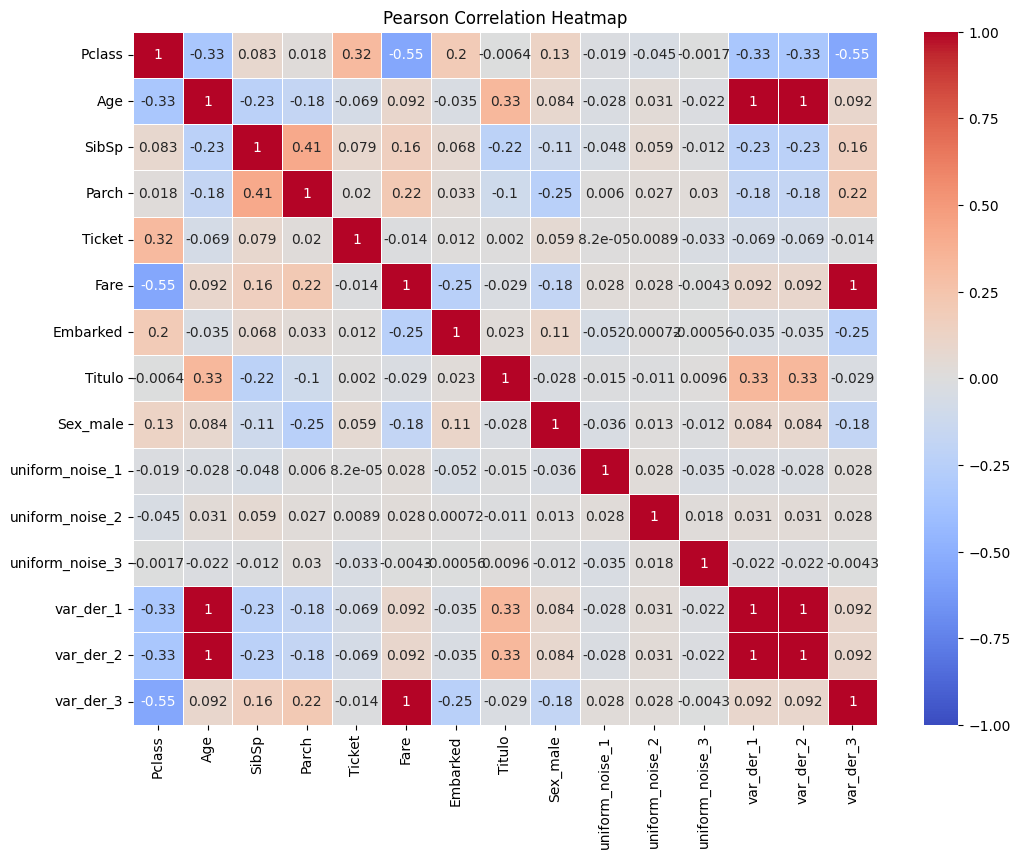

In [178]:
import seaborn as sns

def plot_correlation_heatmap(df):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 9))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Pearson Correlation Heatmap')
    plt.show()

# Testing the function on the iris data (without the target column)
plot_correlation_heatmap(abt_00.drop(columns='Survived'))


## **Seleção de Variáveis por Feature Importance**

A importância das variáveis (ou "feature importance") é frequentemente derivada de modelos específicos, e a formulação matemática para calcular essa importância pode variar dependendo do modelo. No contexto de modelos baseados em árvores, como Random Forest, a importância das variáveis é comumente calculada com base na impureza. Vamos explorar a formulação matemática para esse caso:

### **Feature Importance em Modelos Baseados em Árvores**

Considere uma árvore de decisão individual. A importância de uma variável é computada como:

$
\text{Importância}(X_j) = \sum_{\text{nós } t \text{ onde } X_j \text{ é usada}} \left( p(t) \times \text{Impureza}(t) \right) - p(\text{left}(t)) \times \text{Impureza}(\text{left}(t)) - p(\text{right}(t)) \times \text{Impureza}(\text{right}(t))
$

Onde:

- $ X_j $ é a j-ésima variável.
- O somatório é feito sobre todos os nós da árvore onde $ X_j $ é usada para dividir o nó.
- $ p(t) $ é a proporção de amostras que chegam ao nó $ t $.
- $ \text{Impureza}(t) $ é a medida de impureza no nó $ t $ (por exemplo, Gini impurity ou entropia para árvores de classificação).
- $ \text{left}(t) $ e $ \text{right}(t) $ são os subconjuntos de dados que são enviados para a esquerda e direita, respectivamente, quando o nó $ t $ é dividido usando $ X_j $.

Para uma **Random Forest**, a importância de cada variável é calculada como a média das importâncias da variável em todas as árvores na floresta.

### **Interpretação**:

- A importância calculada fornece uma pontuação para cada variável. Variáveis com maior pontuação são consideradas mais importantes.
- A importância é baseada na capacidade da variável de reduzir a impureza. Se uma variável consegue dividir os dados de uma forma que os subconjuntos resultantes são mais "puros" (ou seja, mais homogêneos em termos da variável resposta), essa variável é considerada importante.
- Essa técnica é "embutida" no sentido de que a importância é derivada diretamente da estrutura do modelo.

É importante notar que, enquanto a importância das variáveis nos dá uma ideia de quais variáveis têm o maior impacto no modelo, ela não nos dá uma indicação da relação entre a variável e a resposta (por exemplo, direção da relação).

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np

X = abt_00.drop(axis=1,columns='Survived')
y = abt_00.Survived

# Treinar modelo com algoritmo Random Forest (Calma, não precisa focar no modelo neste momento)
clf = RandomForestClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.6

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
selected_features


['Ticket', 'Titulo', 'Sex_male']

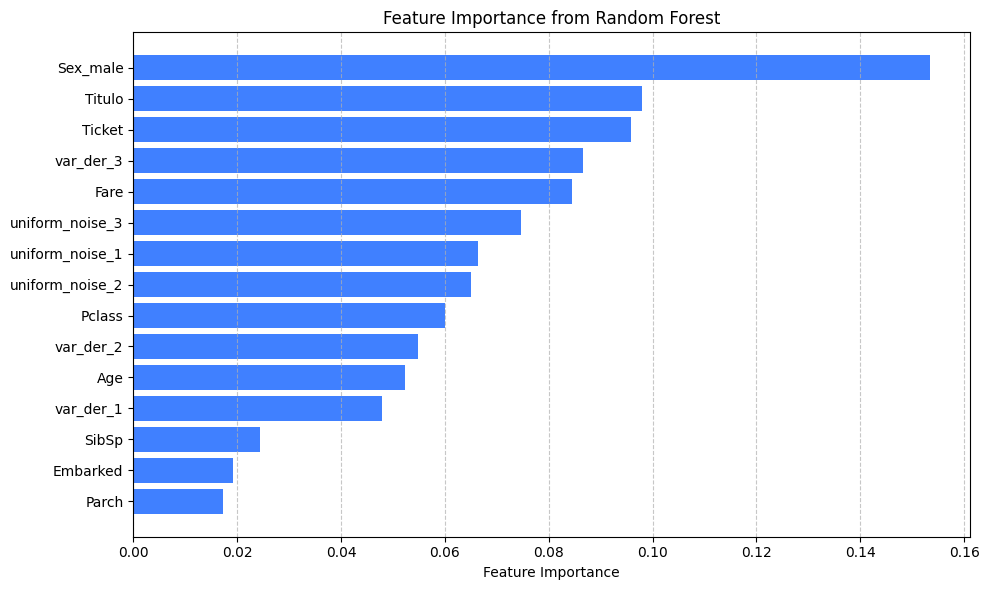

In [116]:
# Visualizando a importância das variáveis em barras horizontais

plt.figure(figsize=(10, 6))
sorted_idx = feature_importances.argsort()

plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color=(0.25, 0.5, 1))  # tom de azul claro
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [117]:
# Mantendo somente as variáveis selecionadas na ABT
abt_03 = abt_00[selected_features + ['Survived']]

abt_03.head()

,Ticket,Titulo,Sex_male,Survived
0,523,3,1.0,0
1,596,4,0.0,1
2,669,2,0.0,1
3,49,4,0.0,1
4,472,3,1.0,0


## **Seleção de variáveis via Boruta**

O Boruta é um algoritmo de seleção de variáveis baseado em Random Forest. O objetivo do Boruta é encontrar e reter apenas as variáveis verdadeiramente importantes no conjunto de dados, enquanto remove aquelas que são apenas ruído.

O algoritmo funciona da seguinte forma:

1. **Duplicação e embaralhamento**: Para cada variável no conjunto de dados original, uma duplicata é criada e embaralhada. Estas são chamadas de variáveis "sombra".
2. **Treinamento (Random FOrest)**: Um modelo de floresta aleatória é treinado no conjunto de dados, que agora inclui as variáveis originais e suas sombras.
3. **Comparação de Importância**: A importância das variáveis originais é comparada com a importância das variáveis sombra. A ideia é que qualquer variável original que tenha importância significativamente maior do que a mais importante variável sombra é considerada relevante.
4. **Iteração**: O processo é repetido várias vezes, com as variáveis menos importantes sendo removidas em cada iteração, até que se tenha uma decisão clara sobre a relevância de cada variável.


In [119]:
!pip install boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.1 MB/s eta 0:00:00


In [126]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Define o modelo - Random Forest
rf = RandomForestClassifier()

# Define o método Boruta
feat_selector = BorutaPy(
                         rf,
                         n_estimators='auto',
                         verbose=0,
                         random_state=1)

X = abt_00.drop(axis=1,columns='Survived')
y = abt_00.Survived

# Executa o Boruta
feat_selector.fit(X.values, y)

# Obtém as variáveis selecionadas
selected_features_boruta = X.columns[feat_selector.support_].tolist()
selected_features_boruta

['Pclass', 'Ticket', 'Fare', 'Titulo', 'Sex_male', 'var_der_3']

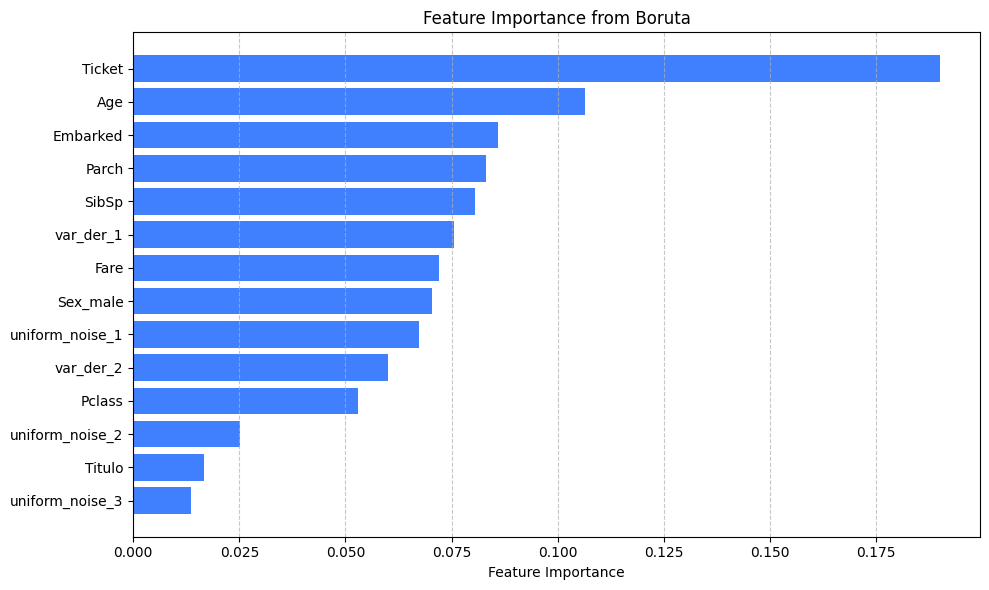

In [125]:
# Supondo que 'feat_selector' é sua instância BorutaPy e 'X' é seu DataFrame de características
importances = rf.feature_importances_
features = X.columns

# Ordenar as variáveis pela importância
sorted_idx = importances.argsort()

# Visualizar a importância das variáveis em barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], importances[sorted_idx], color=(0.25, 0.5, 1))  # tom de azul claro
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Boruta")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [127]:
# Mantendo somente as variáveis selecionadas na ABT
abt_04 = abt_00[selected_features_boruta + ['Survived']]

abt_04.head()

,Pclass,Ticket,Fare,Titulo,Sex_male,var_der_3,Survived
0,1.0,523,0.014151,3,1.0,0.056604,0
1,0.0,596,0.139136,4,0.0,0.556543,1
2,1.0,669,0.015469,2,0.0,0.061874,1
3,0.0,49,0.103644,4,0.0,0.414577,1
4,1.0,472,0.015713,3,1.0,0.062850,0


## **Seleção de Variáveis por RFE**

A técnica de Eliminação Recursiva de Variáveis (Recursive Feature Elimination, RFE) é uma ótima abordagem para seleção de variáveis e é frequentemente usada em situações em que se deseja reduzir a dimensão do conjunto de dados mantendo as variáveis mais significativas.

### O que é RFE?

A Eliminação Recursiva de Variáveis (RFE) é uma técnica que seleciona variáveis de forma iterativa, treinando um modelo várias vezes. Em cada iteração, a variável considerada a "menos importante" é removida, reduzindo assim a dimensão do conjunto de dados.

### Como o RFE funciona?

1. Treine o modelo com todas as variáveis.
2. Avalie a importância de cada variável. Isso é geralmente feito com base em coeficientes (para modelos lineares) ou importância de variáveis (para modelos baseados em árvores).
3. Remova a variável menos importante.
4. Repita os passos 1-3 até que o número desejado de variáveis seja atingido ou até que se cumpra algum outro critério.

### Pontos relevantes a considerar sobre o RFE
- Modelo Base: O modelo base usado no RFE deve ser escolhido com cuidado. Nem todos os modelos são adequados para todas as situações.
- Custo Computacional: O RFE pode ser computacionalmente caro, especialmente com um grande número de variáveis, pois requer treinar o modelo várias vezes.





In [139]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instancie o modelo (escolha um algoritmo desejado)
model = DecisionTreeClassifier()

# Instancie o RFE e selecione 2 variáveis
n_vars_keep = 2
X = abt_00.drop(axis=1,columns='Survived')
y = abt_00.Survived

# Instancie o RFE
rfe = RFE(estimator=model, n_features_to_select=n_vars_keep)
fit = rfe.fit(X, y)

selected_features_rfe = list(X.columns[fit.support_])
selected_features_rfe


['Ticket', 'Sex_male']

In [137]:
# Mantendo somente as variáveis selecionadas na ABT
abt_05 = abt_00[selected_features_rfe + ['Survived']]

abt_05.head()

,Ticket,Fare,Sex_male,uniform_noise_2,Survived
0,523,0.014151,1.0,0.803695,0
1,596,0.139136,0.0,0.864149,1
2,669,0.015469,0.0,0.921534,1
3,49,0.103644,0.0,0.693527,1
4,472,0.015713,1.0,0.669193,0


## **Seleção de Variáveis por Information Value (Target Binário)**

O Valor de Informação (Information Value, IV) é uma métrica frequentemente usada em modelagem de crédito e outros domínios para avaliar a força preditiva de uma variável categórica em relação a uma variável alvo binária. Ele quantifica o quanto a presença (ou ausência) de uma categoria em particular de uma variável é útil para prever o resultado.

### Explicação:

O IV é calculado a partir do Peso da Evidência (Weight of Evidence, WoE) para cada categoria da variável. O WoE para uma categoria específica é o logaritmo da razão das proporções de eventos "bons" e "ruins" naquela categoria:

$
\text{WoE} = \ln\left(\frac{\text{Distr}_\text{Good}}{\text{Distr}_\text{Bad}}\right)
$

Onde:

- $\text{Distr}_\text{Good}$ é a proporção de eventos "bons" na categoria em relação a todos os eventos "bons".
- $\text{Distr}_\text{Bad}$ é a proporção de eventos "ruins" na categoria em relação a todos os eventos "ruins".

O IV para uma variável é a soma dos produtos da diferença entre $\text{Distr}_\text{Good}$ e $\text{Distr}_\text{Bad}$ pelo WoE, calculado para cada categoria da variável:

$
\text{IV} = \sum \left(\text{Distr}_\text{Good} - \text{Distr}_\text{Bad}\right) \times \text{WoE}
$

### Interpretação do IV:

A força preditiva de uma variável com base no seu IV pode ser interpretada da seguinte forma:

- Muito fraco: IV < 0.02
- Fraco: 0.02 <= IV < 0.1
- Moderado: 0.1 <= IV < 0.3
- Forte: 0.3 <= IV < 0.5
- Muito forte: IV >= 0.5

### Considerações:

- O IV é uma métrica univariada, o que significa que avalia a relação entre uma variável individual e a variável alvo, sem levar em consideração outras variáveis.
- O IV é mais apropriado para variáveis categóricas. Se você tem variáveis contínuas, elas devem ser discretizadas (por exemplo, em intervalos) antes de calcular o IV.
- Enquanto o IV fornece uma medida útil da força preditiva de uma variável, é importante também considerar outras informações e o contexto ao decidir incluir ou excluir uma variável de um modelo.

In [157]:
def discretize_numeric_features(df, bins):
    df_discretized = df.copy()
    for col in df.columns:
        if df[col].dtype in ['float64', 'float32', 'int64', 'int32'] and len(df[col].unique()) > bins:
            df_discretized[col] = pd.cut(df[col], bins=bins, labels=False, duplicates='drop')
    return df_discretized

def calculate_iv(df, feature, target):
    lst = []
    for value in df[feature].unique():
        lst.append({
            'Value': value,
            'All': df[df[feature] == value].count()[feature],
            'Good': df[(df[feature] == value) & (df[target] == 1)].count()[feature],
            'Bad': df[(df[feature] == value) & (df[target] == 0)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = (dset['Good'] + 0.0001) / (dset['Good'].sum() + 0.0001)  # Adding a small value to avoid division by zero
    dset['Distr_Bad'] = (dset['Bad'] + 0.0001) / (dset['Bad'].sum() + 0.0001)  # Adding a small value to avoid division by zero
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad']).replace({np.inf: 0, -np.inf: 0})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    return dset['IV'].sum()

def classify_iv(iv_value):
    if iv_value < 0.02:
        return "Muito Fraco"
    elif iv_value < 0.1:
        return "Fraco"
    elif iv_value < 0.3:
        return "Moderado"
    elif iv_value < 0.5:
        return "Forte"
    else:
        return "Muito Forte"

# def select_features_by_iv_with_progress(df, target, iv_cutoff_ratio=1.0):
#     from tqdm import tqdm
#     iv_stats = []
#     for col in tqdm(df.columns, desc="Calculating IV", unit="variable"):
#         if col != target:
#             iv_value = calculate_iv(df, col, target)
#             iv_stats.append({
#                 'Variable': col,
#                 'IV': iv_value,
#                 'Predictiveness': classify_iv(iv_value)
#             })

#     iv_df = pd.DataFrame(iv_stats).sort_values(by='IV', ascending=False)
#     max_iv = iv_df['IV'].max()
#     cutoff_value = iv_cutoff_ratio * max_iv
#     selected_features = iv_df[iv_df['IV'] >= cutoff_value]['Variable'].tolist()

#     return selected_features, iv_df

def select_features_by_iv_discretized(df, target, iv_cutoff_ratio=1.0, bins=10):
    from tqdm import tqdm
    df = discretize_numeric_features(df, bins)

    iv_stats = []
    for col in tqdm(df.columns, desc="Calculating IV", unit="variable"):
        if col != target:
            iv_value = calculate_iv(df, col, target)
            iv_stats.append({
                'Variable': col,
                'IV': iv_value,
                'Predictiveness': classify_iv(iv_value)
            })

    iv_df = pd.DataFrame(iv_stats).sort_values(by='IV', ascending=False)
    max_iv = iv_df['IV'].max()
    cutoff_value = iv_cutoff_ratio * max_iv
    selected_features = iv_df[iv_df['IV'] >= cutoff_value]['Variable'].tolist()

    return selected_features, iv_df

In [163]:
# Testing the function using a binarized version of the iris dataset
selected_vars_iv, iv_data = select_features_by_iv_discretized(abt_00, 'Survived', iv_cutoff_ratio=0.25, bins=10)
selected_vars_iv

Calculating IV: 100%|██████████| 16/16 [00:00<00:00, 16.39variable/s]


['Titulo', 'Sex_male', 'Ticket', 'Pclass', 'Fare', 'var_der_3']

In [162]:
iv_data

,Variable,IV,Predictiveness
7,Titulo,1.493984,Muito Forte
8,Sex_male,1.341680,Muito Forte
4,Ticket,0.519608,Muito Forte
0,Pclass,0.500949,Muito Forte
5,Fare,0.482801,Forte
14,var_der_3,0.482801,Forte
2,SibSp,0.372875,Forte
1,Age,0.298704,Moderado
12,var_der_1,0.298704,Moderado
13,var_der_2,0.298704,Moderado


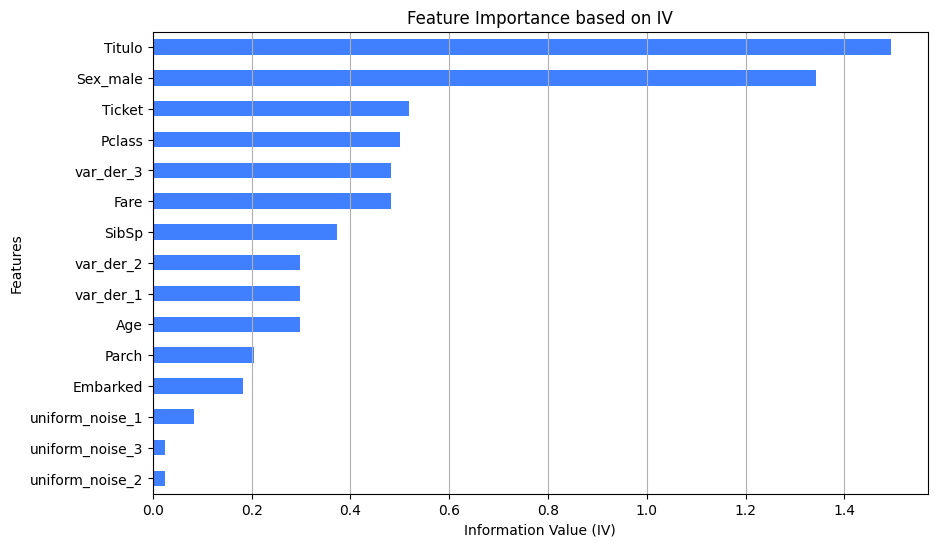

In [166]:
import matplotlib.pyplot as plt

def plot_iv(df_iv_data):
    plt.figure(figsize=(10, 6))
    df_iv_data.sort_values('IV').set_index('Variable')['IV'].plot(kind='barh', color=(0.25, 0.5, 1))
    plt.xlabel('Information Value (IV)')
    plt.ylabel('Features')
    plt.title('Feature Importance based on IV')
    plt.grid(axis='x')
    plt.show()

plot_iv(iv_data)


In [164]:
# Mantendo somente as variáveis selecionadas na ABT
abt_06 = abt_00[selected_vars_iv + ['Survived']]

abt_06.head()

,Titulo,Sex_male,Ticket,Pclass,Fare,var_der_3,Survived
0,3,1.0,523,1.0,0.014151,0.056604,0
1,4,0.0,596,0.0,0.139136,0.556543,1
2,2,0.0,669,1.0,0.015469,0.061874,1
3,4,0.0,49,0.0,0.103644,0.414577,1
4,3,1.0,472,1.0,0.015713,0.062850,0
